 ## Applying Statistical ML models to predict Heart Disease in Patients

In [2]:
## Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

## Importing DataFrame

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Data Visiualization 

## Navya's Part

/var/folders/1q/68ztznfn4kqf6ytxw5q_gg0r0000gn/T/ipykernel_2307/966960762.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(['Female','Male'])


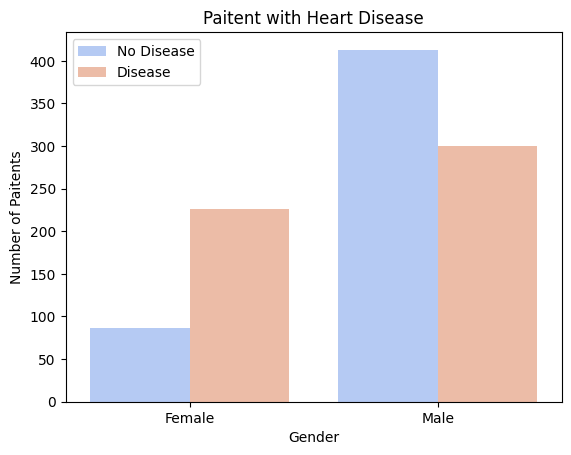

In [6]:
## Checking patient genders with heart disease distribution
import matplotlib.pyplot as plt
import seaborn as sns
fig = sns.countplot(x = 'sex' , data = df, palette='coolwarm', hue='target')

fig.set_xticklabels(['Female','Male'])

plt.title('Paitent with Heart Disease')
plt.xlabel('Gender')
plt.ylabel('Number of Paitents')
plt.legend(['No Disease', 'Disease'])
plt.show()


### Target Variable

/var/folders/1q/68ztznfn4kqf6ytxw5q_gg0r0000gn/T/ipykernel_2307/3569980832.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.countplot(x = 'target' , data = df , palette= 'pastel')
/var/folders/1q/68ztznfn4kqf6ytxw5q_gg0r0000gn/T/ipykernel_2307/3569980832.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(['Positive','Negative'])


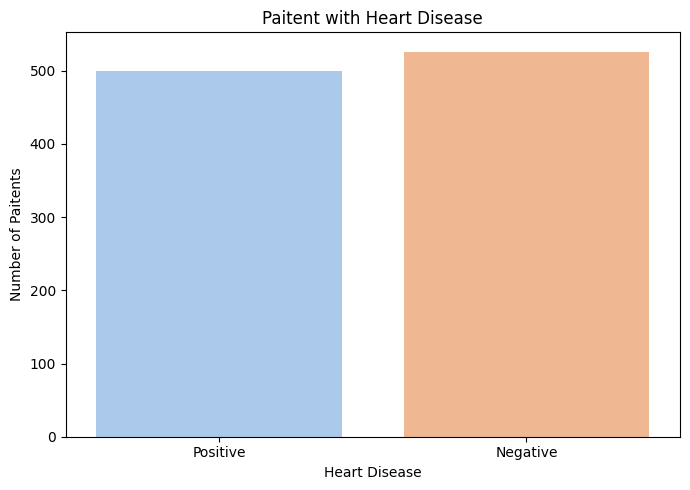

In [7]:
## Checking patient with heart disease
plt.figure(figsize=(7,5))
fig = sns.countplot(x = 'target' , data = df , palette= 'pastel')
fig.set_xticklabels(['Positive','Negative'])
plt.title('Paitent with Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Number of Paitents')
#plt.legend(['No Disease', 'Disease'])
plt.tight_layout()
plt.show()


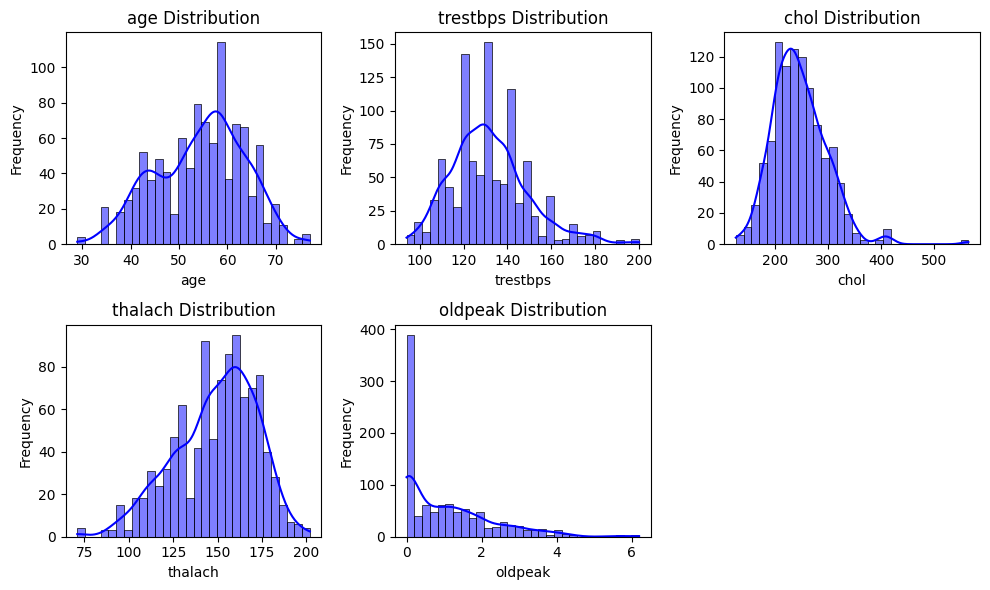

In [8]:
## Checking the distribution of numerical features
plt.figure(figsize=(10, 6))

nominal_features = ['age', 'trestbps', 'chol','thalach', 'oldpeak']
# Plot data on each subplot
for i, column in enumerate(nominal_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[column], color='blue', kde=True, bins=30)

    plt.title(f'{column} Distribution')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# creating bins for age
df['age'] = pd.cut(df['age'], bins = [1, 29, 40, 50, 60, 70, 100], labels = ['0', '1', '2', '3', '4', '5'])
df.age.head()

0    3
1    3
2    4
3    4
4    4
Name: age, dtype: category
Categories (6, object): ['0' < '1' < '2' < '3' < '4' < '5']

In [10]:
# converting age to numerical
df['age'] = df['age'].cat.codes

/var/folders/1q/68ztznfn4kqf6ytxw5q_gg0r0000gn/T/ipykernel_2307/1009349121.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[column], palette = 'viridis')
/var/folders/1q/68ztznfn4kqf6ytxw5q_gg0r0000gn/T/ipykernel_2307/1009349121.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[column], palette = 'viridis')
/var/folders/1q/68ztznfn4kqf6ytxw5q_gg0r0000gn/T/ipykernel_2307/1009349121.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[column], palette = 'viridis')
/var/folders/1q/68ztznfn4kqf6ytxw5q_gg0r0000gn/T/

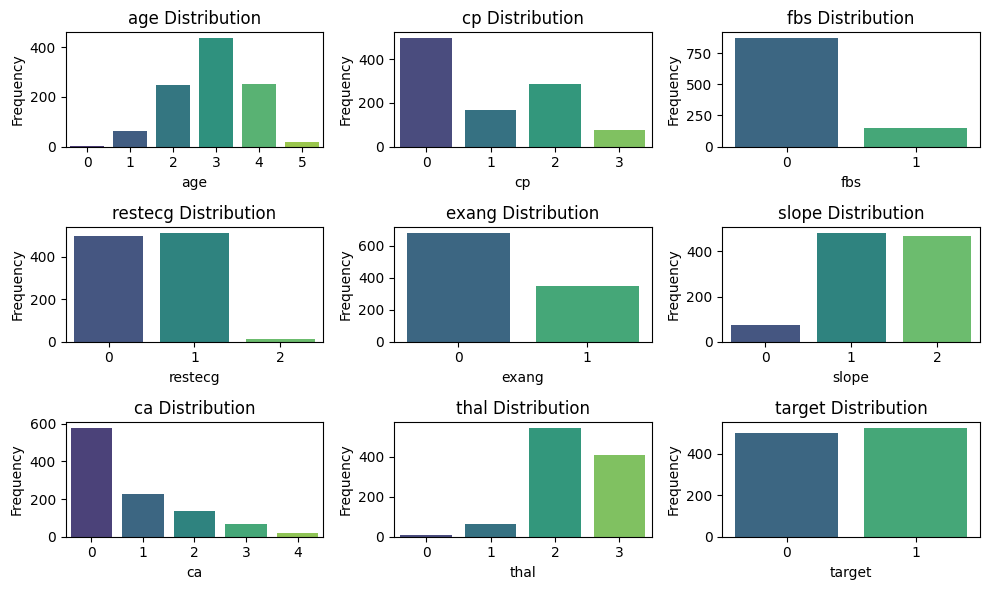

In [11]:
# checking the distribution of binary features
plt.figure(figsize=(10, 6))
binom = ['age', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal', 'target']
# Plot data on each subplot
for i, column in enumerate(binom):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[column], palette = 'viridis')

    plt.title(f'{column} Distribution')
    plt.xlabel(f'{column}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Heatmap plot to check Coorealtion between features 

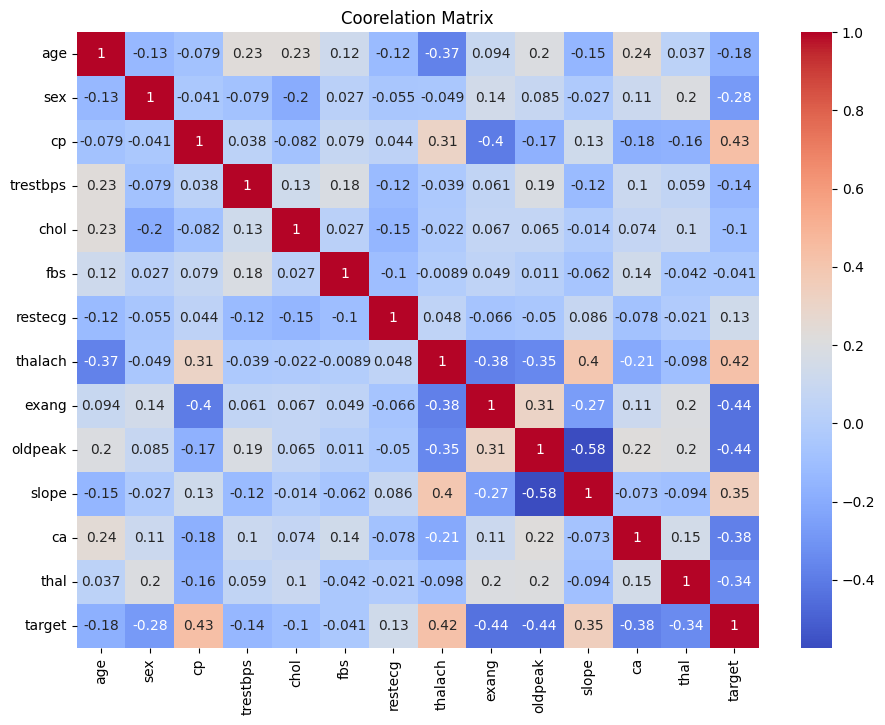

In [12]:
# Checking the coorelation between the features
plt.figure(figsize=(11, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Coorelation Matrix')

plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because n

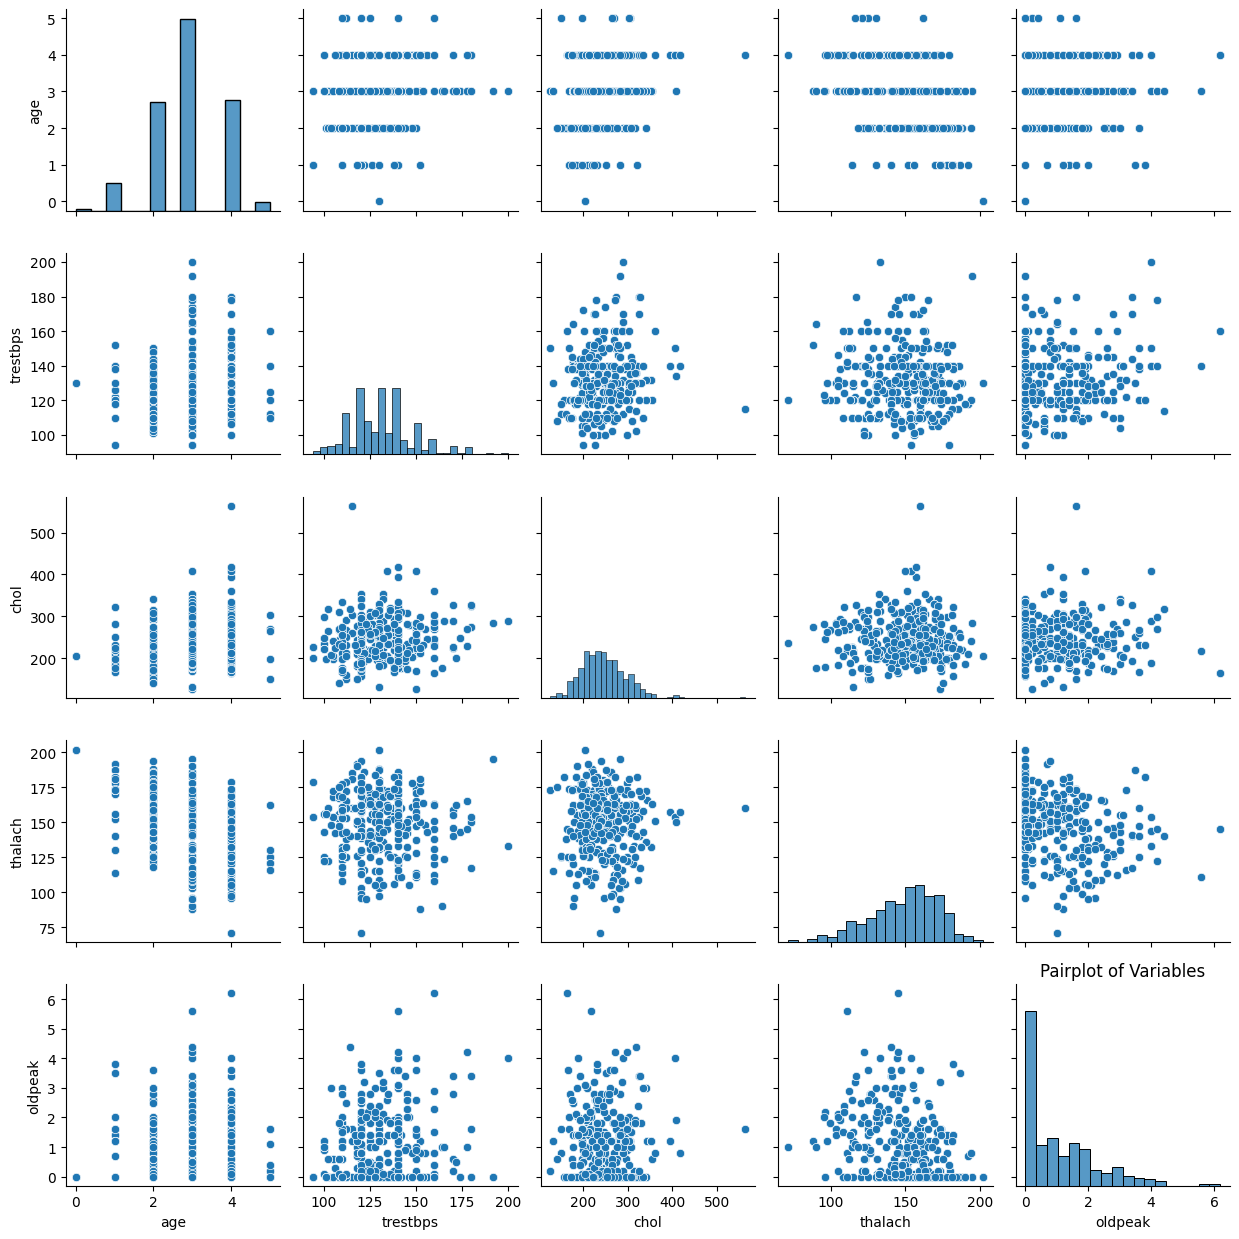

In [13]:
# Plotting the pairplot of the variables
sns.pairplot(df[nominal_features], palette='viridis')
plt.title('Pairplot of Variables')
plt.tight_layout()
plt.show()

# There is not much skewness in the vetaures. Few outliers can be seen in the boxplots

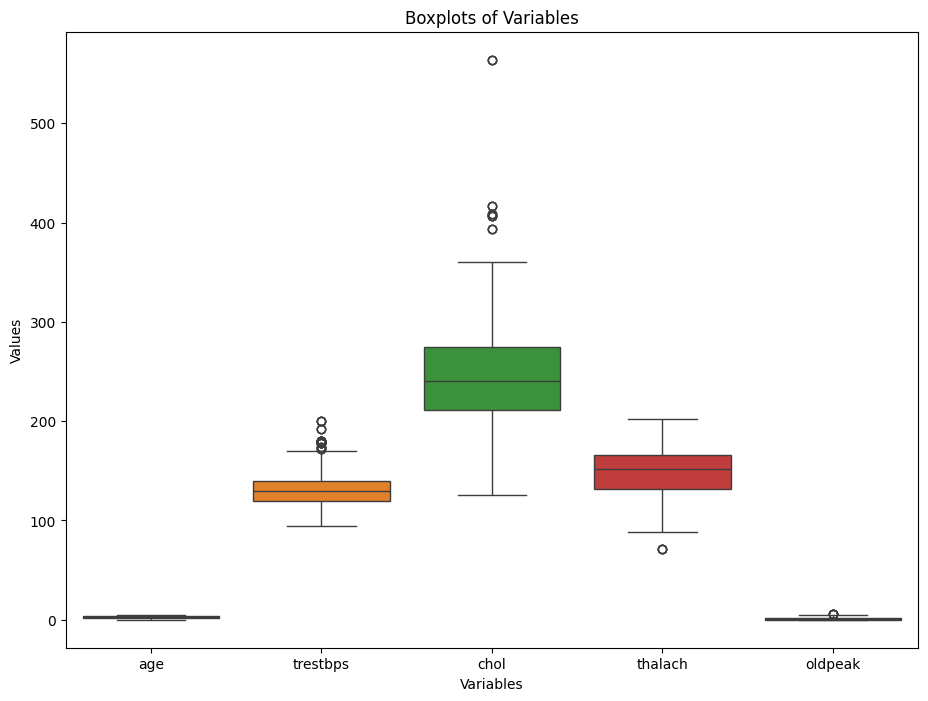

In [14]:
# plotting the boxplot of the variables
plt.figure(figsize=(11, 8))
sns.boxplot(data=df[['age','trestbps', 'chol', 'thalach', 'oldpeak']])
plt.title('Boxplots of Variables')
plt.xlabel('Variables')
plt.ylabel('Values')

plt.show()

# Data PreProcessing

In [15]:
# Removing the outliers from the dataset
import numpy as np
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].mean(), df[col])

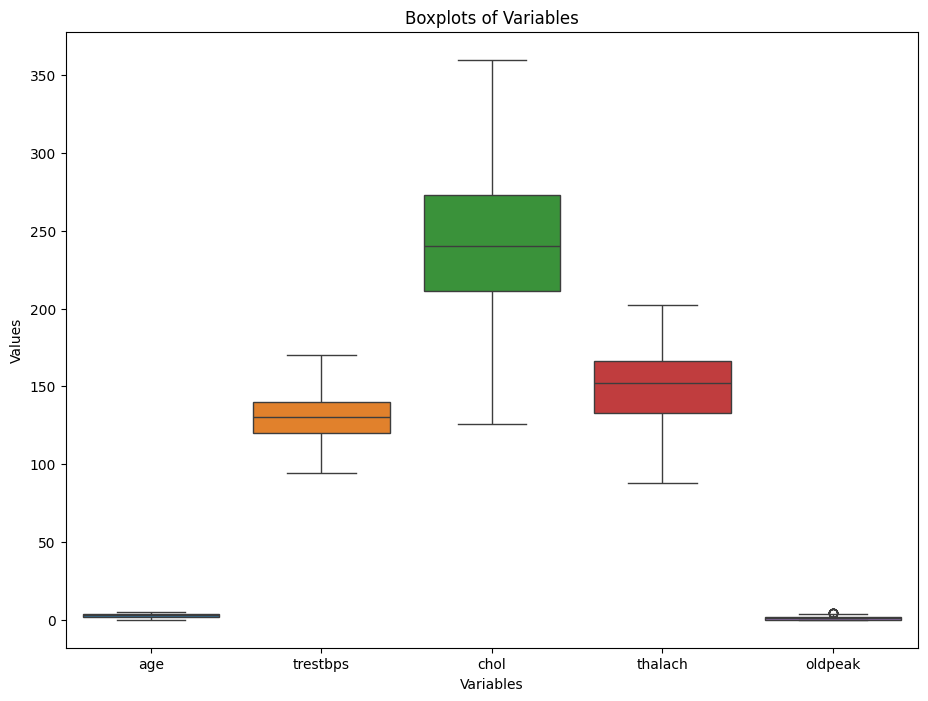

In [16]:
plt.figure(figsize=(11, 8))

sns.boxplot(data=df[['age','trestbps', 'chol', 'thalach', 'oldpeak']])

plt.title('Boxplots of Variables')
plt.xlabel('Variables')
plt.ylabel('Values')

plt.show()


### Usama's Part


## Feature Testing and Feature Selection


In [17]:
# Applying the standard scaler to the dataset
from sklearn.preprocessing import StandardScaler
new_df = df.copy()
scaler = StandardScaler()
new_df[nominal_features] = scaler.fit_transform(new_df[nominal_features])

In [18]:
# Applying the label encoder to the binary features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
new_df[binom] = new_df[binom].apply(lambda col: label_encoder.fit_transform(col))

## Applying ML Models

In [19]:
# importing the required libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve



## Data Splitting

In [20]:
# using Logistic Regression, SVM, Random Forest Classifiers to predict the target variable

X = new_df.drop('target', axis=1)
y = new_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


## Models Used

Model 1: Logistic Regression  

Model 2: SVM  

Model 3: Random Forest Classifier  

In [21]:
# creating list of models

models = [('Logistic Regression',LogisticRegression()), ('SVM',SVC()), ('Random Forest',RandomForestClassifier())]

## Trainning and Testing of Models on Trainning Dataset

In [22]:
# creating a function to fit the models for Training Dataset
# Predicting on the training dataset and calculating the accuracy score

def fit_and_score_train(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models:
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_train, y_train)
    return (model_scores)

model_scores = fit_and_score_train(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.8902439024390244,
 'SVM': 0.9182926829268293,
 'Random Forest': 1.0}

### Trainning and Testing of Models and Predicting on Test Dataset

In [23]:
# creating a function to fit the models for Test Dataset

def fit_and_score_test(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models:
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return (model_scores)

model_scores = fit_and_score_test(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.8439024390243902,
 'SVM': 0.8146341463414634,
 'Random Forest': 0.9853658536585366}

## Applying K-Fold Cross Validation

In [24]:
# Selecting best model using Cross validation by iterating through the models 

for name, model in models:
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{name} has a cross-validated score of {(cv_scores)}')
    print(f'{name} has a cross-validated mean score of {np.mean(cv_scores)}\n')

Logistic Regression has a cross-validated score of [0.92195122 0.86829268 0.88780488 0.83414634 0.84390244]
Logistic Regression has a cross-validated mean score of 0.8712195121951221

SVM has a cross-validated score of [0.89756098 0.87804878 0.89268293 0.84390244 0.86341463]
SVM has a cross-validated mean score of 0.8751219512195123

Random Forest has a cross-validated score of [1.         1.         0.98536585 1.         0.98536585]
Random Forest has a cross-validated mean score of 0.9941463414634146



## Trying to determine the best features using Random Forest Classifier

In [61]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# feature_names = []
# accuracies = []

# # Iterate through each feature (except the target variable)
# for feature in df.columns[:-1]:
#     # Select the current feature and the target variable
#     X = df[[feature]]
#     y = df['target']

#     # Split the data into training and testing sets
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # Train an SVM model using only the current feature
#     rf_model = RandomForestClassifier(random_state=42)
#     rf_model.fit(X_train, y_train)

#     # Make predictions on the testing set
#     y_pred = rf_model.predict(X_test)

#     # Calculate accuracy and store it along with the feature name
#     accuracy = accuracy_score(y_test, y_pred)
#     feature_names.append(feature)
#     accuracies.append(accuracy)

# # Create a plot to visualize the accuracy as the number of features increases
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(feature_names) + 1), accuracies, marker='o', linestyle='-')
# plt.title('Accuracy vs. Number of Features')
# plt.xlabel('Number of Features')
# plt.ylabel('Accuracy')
# plt.xticks(range(1, len(feature_names) + 1), feature_names, rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()


# Selecting Random Forest as a Best Model  

## Feature Selection and Testing

In [44]:
from sklearn.feature_selection import SelectFromModel

clf = RandomForestClassifier(random_state=42)

selector = SelectFromModel(estimator = clf)
selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.get_support()]

# Transform the training and test sets with selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)



In [59]:
# Important fetures selected
selected_features

Index(['cp', 'chol', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')

In [39]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


## Applying GridSearch to tune Hyperparameters

# from scikit learn list of Parameters for Random Forest Classifier 

selecting:  

•n_estimators  
•max_depth  
•min_samples_split  
•min_samples_leaf  
•max_features
•bootstrap

In [28]:
# for params, score in zip(grid_search.cv_results_['params'], grid_search.cv_results_['mean_test_score']):
#     print(params, score)

In [40]:
# # Creating a hyperparameter grid for Random Forest Classifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Specify specific number of features
}

In [30]:
# grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_train_selected, y_train)
# best_param = grid_search.best_params_


## Performing Random Search for Hyperparameter Tunning

In [41]:
from sklearn.model_selection import RandomizedSearchCV

grid_search = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_grid, n_iter=10, cv=3, random_state=42, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)
best_param = grid_search.best_params_


## Using Best Hyperparameters for Model Prediction

In [42]:
print(f'The best parameters are {best_param}')

The best parameters are {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


## Prdicting with the best Model and Hyperparameter 'Random Forest Classifier'

In [43]:
best_rf_clf = RandomForestClassifier(**best_param)
best_rf_clf.fit(X_train_selected, y_train)

y_pred = best_rf_clf.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
print('Model Performance')
print('\nAccuracy with Best-RFC: ' ,(accuracy))

# Creating a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix\n', conf_matrix)

# Creating a classification report
class_report = classification_report(y_test, y_pred)
print('\nClassification Report\n', class_report)

# Sensitivity and Specificity

sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
print('\nSensitivity : ', sensitivity )

specificity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
print('\nSpecificity : ', specificity)

Model Performance

Accuracy with Best-RFC:  0.9853658536585366

Confusion Matrix
 [[102   0]
 [  3 100]]

Classification Report
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Sensitivity :  1.0

Specificity :  0.970873786407767


# Model Performance

### Accuracy with Best-RFC:  0.9853658536585366

### Confusion Matrix  
 
 [[102   0]  
 
 [  3 100]]

### Classification Report  

               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


### Sensitivity :  1.0

### Specificity :  0.970873786407767